# **Section 1: Summary of the project**
My project "Baby Emotion Detection" is a system that detects whether a baby is crying, happy or sleeping. This model is helpful for the parents to keep monitoring their child. It can be used to make automatic swing which swings when a baby is crying. This is a multiclass problem with three classes- crying, happy or sleeping.

I chose CNN model with different layers for this model. For the dataset, I downloaded lots of images from google search using "Download All Images" which is a google extension for downloading all images present in a current page. Then, I removed all the unrelevant images and kept the remaining in three different directories (each for a class).Then, I created training data out of it using pickle library and saved as "saru_week10_data.pickle". Each instance of my dataset contains array form of image and its related class as a list. Datatype of array image is uint8 and shape is 90 x 60 pixels.

I set a target of 80% accuracy, which is a good threshold for this problem. This model should be able to correctly predict what a baby is doing based on his/her facial expression.


In [ ]:
#importing necessary libraries at first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

I use google colab. So, I first uploaded my folder as zip file and unzip it using following code.

In [ ]:
!unzip -q saru_week10_data.zip

In [ ]:
dir = 'saru_week10_data'

In [ ]:
categories = ['crying','happy','sleeping']

In [ ]:
ImgSizeW = 60
ImgSizeH = 90

In [ ]:
#function to create training dataset
def createTrainingData():
    trainingData = []
    for category in categories:
        path = os.path.join(dir,category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(ImgSizeW,ImgSizeH))
                trainingData.append([new_array,category])
            except:
                pass
    return trainingData

In [ ]:
dataset = createTrainingData() #creating dataset

100%|██████████| 588/588 [00:03<00:00, 164.14it/s]


In [ ]:
len(dataset) #total length of my dataset

1805

In [ ]:
first_img = dataset[0][0]
print(f'Shape of image: {first_img.shape}')
print(f'Datatype of image: {first_img.dtype}')
print(f'Image type: {type(first_img)}')


Shape of image: (90, 60, 3)
Datatype of image: uint8
Image type: <class 'numpy.ndarray'>


## **Saving my dataset as pickle file**

In [ ]:
import pickle

In [ ]:
pickleOut = open('saru_week10_data.pickle','wb')
pickle.dump(dataset,pickleOut)
pickleOut.close()

# **Section 2: Architecture of the model**
I used CNN model for this problem with different layers. CNN is best for image classification problem. I first started with the initialization of the model followed by convolution layers with ReLu as activation function and then batch normalization layer, max pool layer and dropout. The output layer is a dense layer with softmax as an activation layer. And then I compiled the model using adam as an optimizer, loss as categorical crossentropy and metrics as accuracy.

*   Convolution  layers: These are the layers where filters are applied to the images. Different features of the image are extracted here.
*   Batch Normalization layer: It normalize the output of previous layer. It allows every layer of the network to do learning independently. It also makes learning efficient and can be used to avoid overfitting.
*   Pooling layer: I am using max pooling layers, which takes maximum value in a certain filter region. These layers are used to reduce the dimensionality of the network.
*   Dropout layer: Dropout layer is used to prevent overfitting in the model and enhance learning of the model. It is considered good to assign rate of dropout to 0.5 or less. 
*   Flatten layer: This layer flattens all the feature maps into a single vector.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPool2D, Flatten
from keras.optimizers import Adam, SGD

In [ ]:
def get_model(classes=3):
     #Initialising the CNN
    model = Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape =(90,60,3)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [ ]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 88, 58, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 86, 56, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 86, 56, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 43, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 43, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 26, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 39, 24, 128)       1

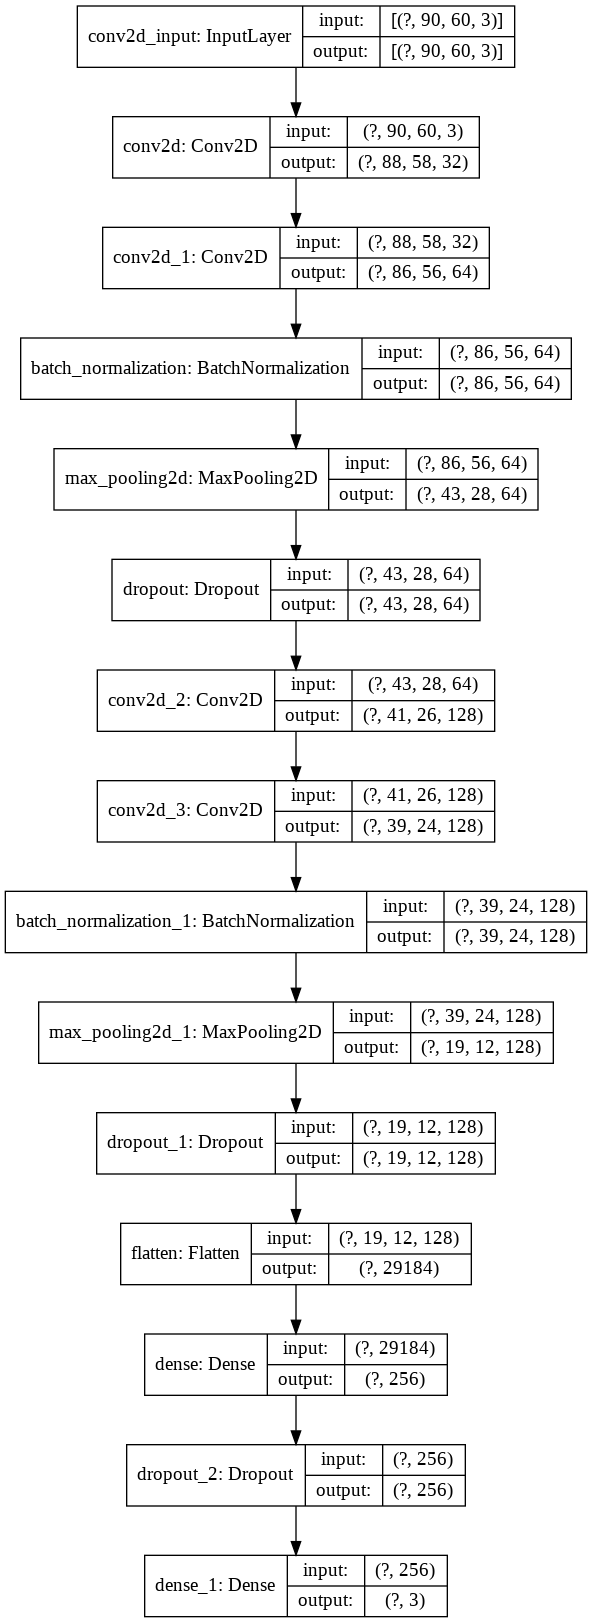

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# **Section 3: Output of the model**

In [ ]:
# loading my dataset
pickleIn = open('saru_week10_data.pickle','rb')
data = pickle.load(pickleIn)

## **Showing data**

In [ ]:
len(data) #total number of data

1805

In [ ]:
#counting total number of data in each class
dict_ = {'crying':0,'happy':0,'sleeping':0}
for value in data:
  dict_[value[1]]+=1

In [ ]:
valueCount = pd.DataFrame(dict_,index=['TotalRecords'])
valueCount

,crying,happy,sleeping
TotalRecords,437,780,588


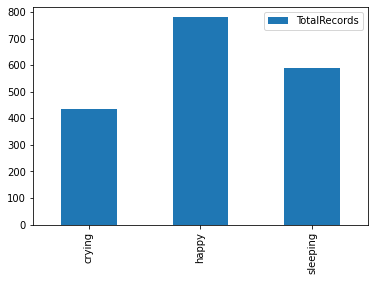

In [ ]:
valueCount.transpose().plot(kind='bar') #histogram of distribution of my data

In [ ]:
#shuffling the data
import random
random.shuffle(data) 

## **Plotting 16 images with its label**

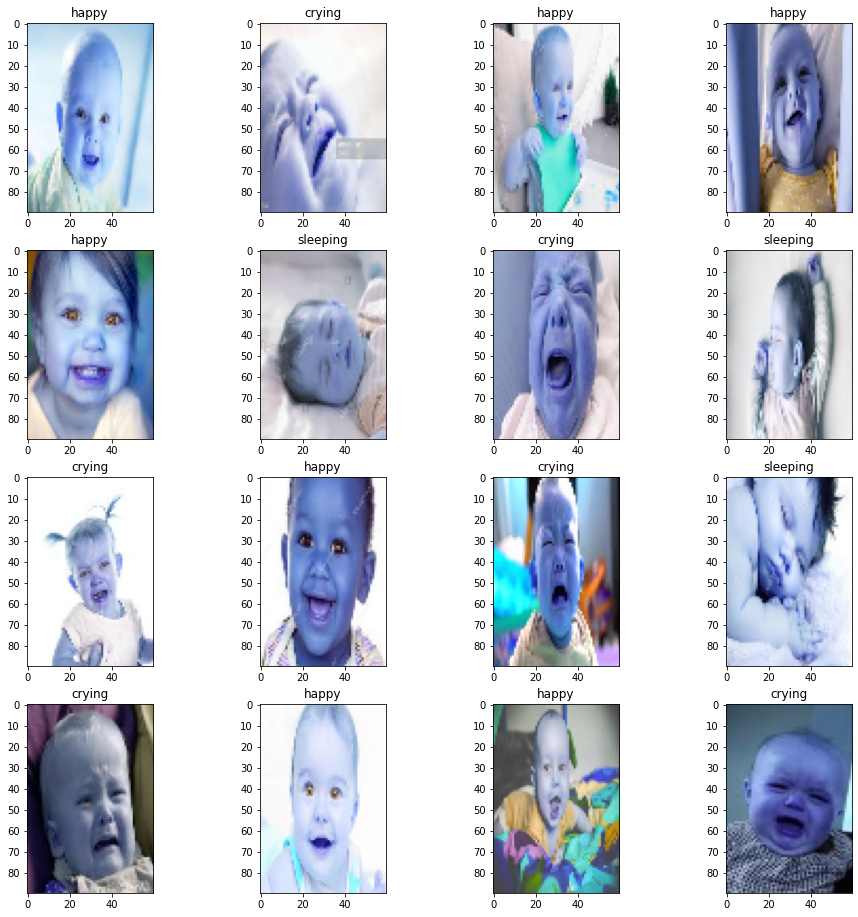

In [ ]:
plt.figure(figsize=(16,16))
column = 4
row = 4
for i in range(1,row*column + 1):
  plt.subplot(row,column,i)
  plt.imshow(data[i][0])
  plt.title(data[i][1])
plt.show()

## **Splitting data into train, test set**
I am going to split the dataset into 80% training set and 20% testing set. In the following code, setting test_size=0.2 will do that.

In [ ]:
X = []
y = []

for features,label in data:
    X.append(features)
    y.append(label)
X = np.array(X)
y = np.array(y)
print(y[:10])

['happy' 'happy' 'crying' 'happy' 'happy' 'happy' 'sleeping' 'crying'
 'sleeping' 'crying']


In [ ]:
y = np.unique(y,return_inverse=True)[1]
print(y[:10])

[1 1 0 1 1 1 2 0 2 0]


In [ ]:
# splitting dataset into train, test set using scikit-learn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train_cls,y_test_cls = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape,x_test.shape,y_train_cls.shape,y_test_cls.shape)

(1444, 90, 60, 3) (361, 90, 60, 3) (1444,) (361,)


In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train_cls,3)
y_test = to_categorical(y_test_cls,3)

In [ ]:
y_train.shape

(1444, 3)

## **Training and evaluating the model**

In [ ]:
# training the model using 50 epochs
epochs = 50
myModel = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
46/46 [==============================] - 1s 16ms/step - loss: 0.4713 - accuracy: 0.8809 - val_loss: 1.2740 - val_accuracy: 0.6011
Epoch 2/50
46/46 [==============================] - 1s 15ms/step - loss: 0.3068 - accuracy: 0.9044 - val_loss: 0.5523 - val_accuracy: 0.8283
Epoch 3/50
46/46 [==============================] - 1s 15ms/step - loss: 0.2307 - accuracy: 0.9183 - val_loss: 0.3893 - val_accuracy: 0.8670
Epoch 4/50
46/46 [==============================] - 1s 15ms/step - loss: 0.1735 - accuracy: 0.9404 - val_loss: 0.4647 - val_accuracy: 0.8421
Epoch 5/50
46/46 [==============================] - 1s 15ms/step - loss: 0.1612 - accuracy: 0.9439 - val_loss: 1.2653 - val_accuracy: 0.7729
Epoch 6/50
46/46 [==============================] - 1s 15ms/step - loss: 0.1143 - accuracy: 0.9571 - val_loss: 0.2662 - val_accuracy: 0.9224
Epoch 7/50
46/46 [==============================] - 1s 15ms/step - loss: 0.0996 - accuracy: 0.9661 - val_loss: 0.2782 - val_accuracy: 0.8947
Epoch 8/50
46

In [ ]:
 train_loss, train_accuracy = model.evaluate(x_train,y_train)
 val_loss, val_accuracy = model.evaluate(x_test,y_test)
 print(f'Training accuracy: {train_accuracy:.2f} \nValidation accuracy: {val_accuracy:.2f}')

12/12 [==============================] - 0s 4ms/step - loss: 0.6310 - accuracy: 0.8643
Training accuracy: 0.99 
Validation accuracy: 0.86


## **Confusion Matrix and Classification Report for training data**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

prediction_train = model.predict_classes(x_train)

cm_train = confusion_matrix(y_train_cls, prediction_train)
print("Confusion Matrix")
print(cm_train)

cr_train = classification_report(y_train_cls, prediction_train, target_names=categories)
print("\nClassification Report")
print(cr_train)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion Matrix
[[350   0   0]
 [  7 628   1]
 [  4   1 453]]

Classification Report
              precision    recall  f1-score   support

      crying       0.97      1.00      0.98       350
       happy       1.00      0.99      0.99       636
    sleeping       1.00      0.99      0.99       458

    accuracy                           0.99      1444
   macro avg       0.99      0.99      0.99      1444
weighted avg       0.99      0.99      0.99      1444



## **Confusion Matrix and Classification Report for testing data**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict_classes(x_test)

cm_train = confusion_matrix(y_test_cls, prediction)
print("Confusion Matrix")
print(cm_train)

cr_train = classification_report(y_test_cls, prediction, target_names=categories)
print("\nClassification Report")
print(cr_train)

Confusion Matrix
[[ 79   5   3]
 [ 14 125   5]
 [ 13   9 108]]

Classification Report
              precision    recall  f1-score   support

      crying       0.75      0.91      0.82        87
       happy       0.90      0.87      0.88       144
    sleeping       0.93      0.83      0.88       130

    accuracy                           0.86       361
   macro avg       0.86      0.87      0.86       361
weighted avg       0.87      0.86      0.87       361



## **Model Accuracy and Loss Plot**

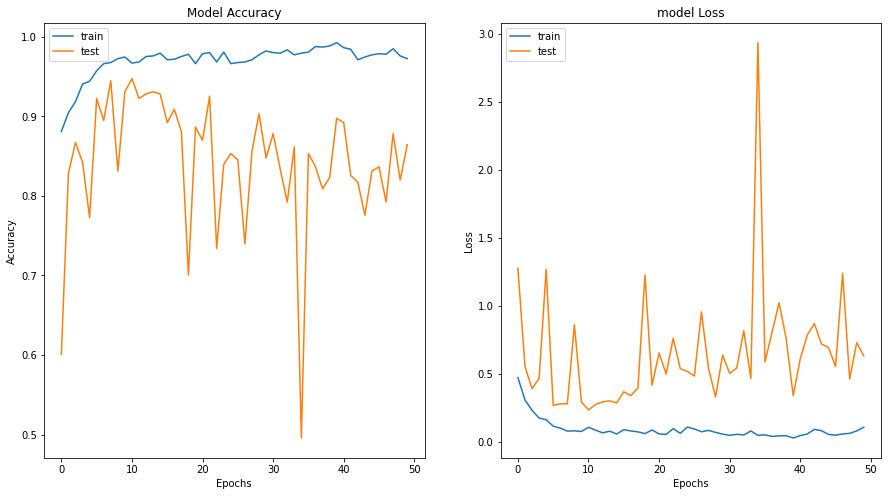

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(myModel.history['accuracy'])
plt.plot(myModel.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(myModel.history['loss'])
plt.plot(myModel.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Section 4: Saving the model**

In [ ]:
model.save("saru_week11_model")

INFO:tensorflow:Assets written to: saru_week11_model/assets


# **Section 5: Test of the model**
The model seems to predict a baby is crying either if the baby has tears or his/her mouth is wide open with eyes closed. Otherwise, it may predict happy if a baby has open mouth and eyes.

I plot different training and testing data to see if the model is able to predict correctly. I also downloaded an image and predict it using the model.

In [ ]:
#loading the model
from tensorflow import keras
loaded_model = keras.models.load_model("saru_week11_model")

## **Prediction in training data**

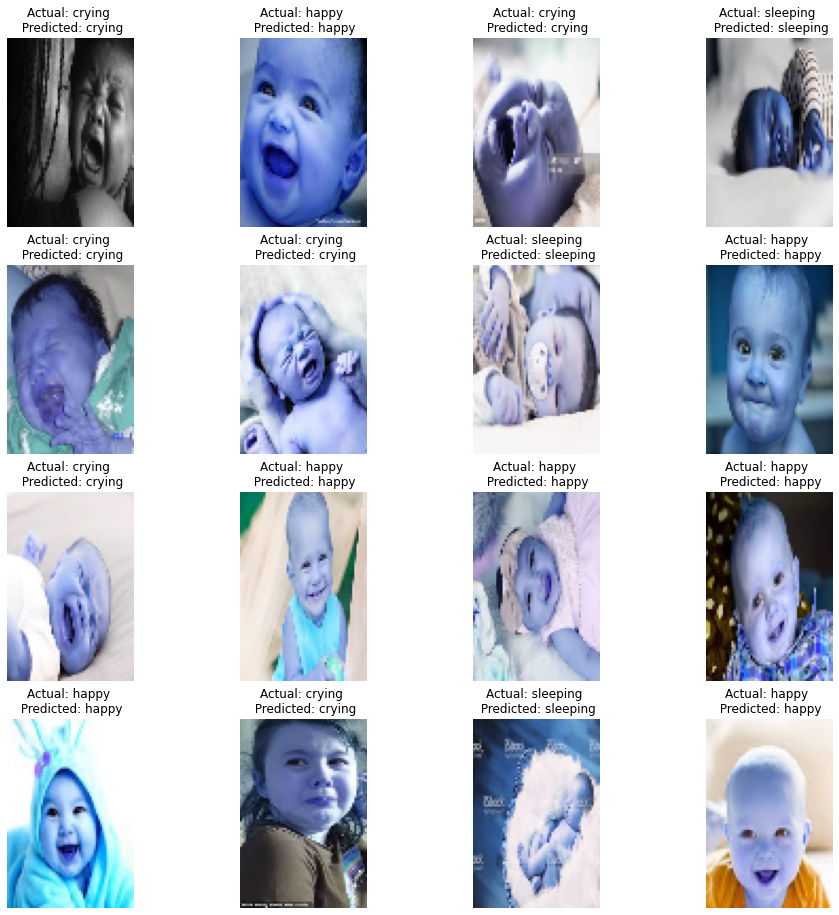

In [ ]:
plt.figure(figsize=(16,16))

for i in range(1,row*column + 1):
  plt.subplot(row,column,i)
  plt.imshow(x_train[i])
  plt.title(f'Actual: {categories[y_train_cls[i]]} \n Predicted: {categories[prediction_train[i]]}')
  plt.axis('off')
plt.show()

## **Prediction in testing data**

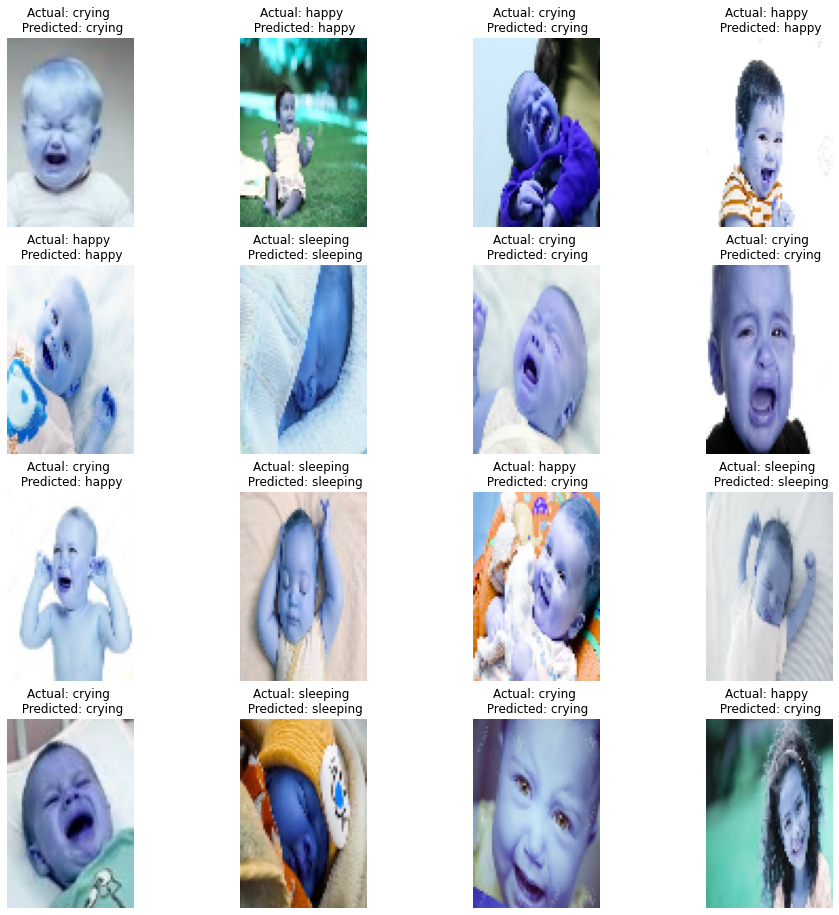

In [ ]:
plt.figure(figsize=(16,16))

for i in range(1,row*column + 1):
  plt.subplot(row,column,i)
  plt.imshow(x_test[i])
  plt.title(f'Actual: {categories[y_test_cls[i]]} \n Predicted: {categories[prediction[i]]}')
  plt.axis('off')
plt.show()

## **Prediction in a downloaded image**

In [ ]:
import urllib.request
from matplotlib import image

def get_picture(url):
    urllib.request.urlretrieve(url,'baby_image.jpg')
    
    img = image.imread('baby_image.jpg')
    img = cv2.resize(img,(60,90))

    return img

In [ ]:
def predict(image):
  img = np.expand_dims(image, axis=0)
  img = np.array(img)
  pred = loaded_model.predict_classes([img])[0]

  plt.figure(figsize=(5,5))
  plt.imshow(image)
  plt.title(f'Prediction: {categories[pred]}')
  plt.axis("off")

In [ ]:
url = input("Enter URL of a baby image: ")

Enter URL of a baby image: http://1.bp.blogspot.com/-8kr7c8YlRkk/T1pWQf6HkaI/AAAAAAAAA34/MJOZjeSvBmA/s1600/baby.jpg


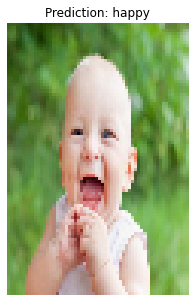

In [ ]:
my_image = get_picture(url)
predict(my_image)

In [ ]:
url = input("Enter URL of a baby image: ")

Enter URL of a baby image: http://i.huffpost.com/gen/3269946/images/o-CRYING-BABY-facebook.jpg


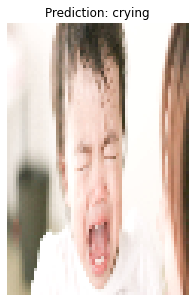

In [ ]:
my_image = get_picture(url)
predict(my_image)

# **Section 6: Summary**
I set a target of 80% accuracy before. My model is giving me accuracy of more than 95%, so the project is successful. The validation accuracy also reached 86%. But there presents an unbalance in the dataset. Images contain different size of baby. Some are full body images while other has only face part of the baby. Also, most images of baby in both crying and happy mood have one similar feature - mouth open.

The hardest part of this project was to collect and preprocess images. After collecting only the relevant images, I cropped most of the image so that it only has facial part which will make it easy to read the expression of the baby. Choosing the right layer for the network was also pretty hard.

To make the model better, I would have collected more images showing only the facial part of the child.